In [154]:
pip install apyori

Note: you may need to restart the kernel to use updated packages.


###  Setup and Data Loading

This section sets up the Python environment for our analysis. We install `apyori` to find association rules and import key libraries like `pandas` for data handling and `matplotlib` for plotting.

The `marketbasket.csv` file is then loaded into a pandas DataFrame called `store_data`, and we display the first 5 rows to ensure everything is ready to go.

In [222]:
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori
import ARutils
%matplotlib inline

In [156]:
store_data=pd.read_csv("marketbasket.csv")

In [157]:
store_data.head()

,apples,banana,coke,turkey,bourbon,ice_cream,baguette,soda,choclate,cracker,cosmetics,avocado,artichoke,sardines
0,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,No,Yes
1,No,No,Yes,No,Yes,No,Yes,Yes,No,No,Yes,Yes,No,No
2,No,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No
3,No,No,Yes,Yes,Yes,No,Yes,No,No,No,Yes,No,No,Yes
4,No,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No


### **2. Data Exploration and Preparation**

In [225]:
# Check for any missing values
print("Missing values per column:")
print(store_data.isnull().sum())
print("\n")

# Prepare data for the Apriori algorithm
# The algorithm requires a list of lists, where each inner list is a transaction.
transactions = []
for i in range(len(store_data)):
    transactions.append([item for item, purchased in store_data.iloc[i].items() if purchased == 'Yes'])

print(f"Total Transactions: {len(transactions)}")
print("Example transactions:")
print(transactions[:5])

Missing values per column:
apples       0
banana       0
coke         0
turkey       0
bourbon      0
ice_cream    0
baguette     0
soda         0
choclate     0
cracker      0
cosmetics    0
avocado      0
artichoke    0
sardines     0
dtype: int64


Total Transactions: 1000
Example transactions:
[['banana', 'coke', 'turkey', 'bourbon', 'baguette', 'soda', 'choclate', 'sardines'], ['coke', 'bourbon', 'baguette', 'soda', 'cosmetics', 'avocado'], ['banana', 'bourbon', 'ice_cream', 'baguette', 'soda', 'choclate', 'cracker', 'cosmetics', 'avocado', 'artichoke'], ['coke', 'turkey', 'bourbon', 'baguette', 'cosmetics', 'sardines'], ['banana', 'bourbon', 'baguette', 'soda', 'choclate', 'cracker', 'avocado', 'artichoke']]


In [158]:
from ast import literal_eval

# If CSV has one column of transactions
col = store_data.columns[0]

def parse_tx(x):
    try:
        if str(x).strip().startswith('['):
            return [i.strip().strip("'\"") for i in literal_eval(str(x))]
        else:
            return [i.strip() for i in str(x).split(',') if i.strip()]
    except Exception:
        return [i.strip() for i in str(x).split(',') if i.strip()]

transactions = store_data[col].fillna('').map(parse_tx).tolist()

# Clean up items
def clean_item(it):
    return str(it).lower().strip()

transactions = [[clean_item(i) for i in tx if i and str(i).strip()] for tx in transactions]

print(f"Transactions: {len(transactions)} | Avg items per tx: {sum(len(tx) for tx in transactions)/len(transactions):.2f}")


Transactions: 1000 | Avg items per tx: 1.00


In [159]:
store_data.tail()


,apples,banana,coke,turkey,bourbon,ice_cream,baguette,soda,choclate,cracker,cosmetics,avocado,artichoke,sardines
995,No,No,No,No,No,No,No,No,No,No,No,No,No,No
996,No,No,No,No,No,No,No,No,No,No,Yes,Yes,No,No
997,No,Yes,Yes,Yes,Yes,No,No,Yes,No,No,Yes,No,Yes,Yes
998,Yes,Yes,No,No,Yes,No,No,No,Yes,Yes,No,No,Yes,Yes
999,No,No,No,No,Yes,No,Yes,Yes,No,Yes,No,No,No,Yes


In [160]:
store_data.describe()

,apples,banana,coke,turkey,bourbon,ice_cream,baguette,soda,choclate,cracker,cosmetics,avocado,artichoke,sardines
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No
freq,946,637,720,851,558,958,721,766,643,619,536,510,678,543


### **3. Item Distribution Plot**

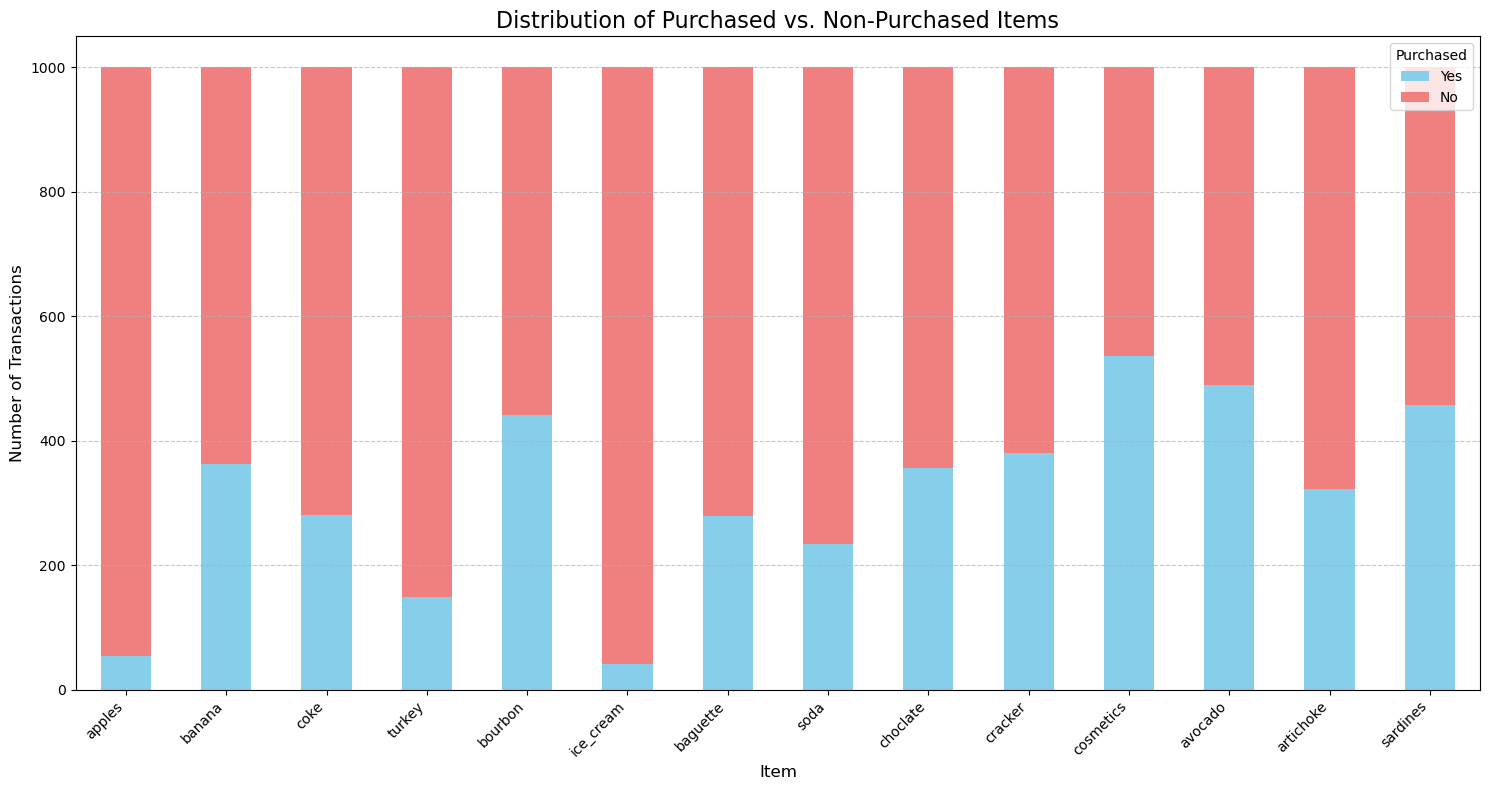

In [161]:
item_counts = {}
for column in store_data.columns:
    yes_count = (store_data[column] == 'Yes').sum()
    no_count = (store_data[column] == 'No').sum()
    item_counts[column] = {'Yes': yes_count, 'No': no_count}

counts_df = pd.DataFrame(item_counts).T

counts_df.plot(kind='bar', stacked=True, figsize=(15, 8), color=['skyblue', 'lightcoral'])

plt.title('Distribution of Purchased vs. Non-Purchased Items', fontsize=16)
plt.xlabel('Item', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Purchased', labels=['Yes', 'No'], fontsize=10)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [162]:
transcations=[
    ['Milk','Bread','Saffron'],
    ['Milk','Saffron'],
    ["Bread","Saffron","Wafer"],
    ["Bread",'Wafer'],
]
transcations
        

[['Milk', 'Bread', 'Saffron'],
 ['Milk', 'Saffron'],
 ['Bread', 'Saffron', 'Wafer'],
 ['Bread', 'Wafer']]

In [163]:
Rules=list(apriori(transcations,min_support=0.4,min_confidence=0.4))

In [164]:
associationRules=ARutils.extract(Rules)
Rules_df=pd.DataFrame(associationRules,columns=['LHS','RHS','Support',"Confidence",'Lift'])
Rules_df


,LHS,RHS,Support,Confidence,Lift
0,[],[Bread],0.75,0.750000,1.000000
1,[],[Milk],0.50,0.500000,1.000000
2,[],[Saffron],0.75,0.750000,1.000000
3,[],[Wafer],0.50,0.500000,1.000000
4,[],"[Bread, Saffron]",0.50,0.500000,1.000000
5,[Bread],[Saffron],0.50,0.666667,0.888889
6,[Saffron],[Bread],0.50,0.666667,0.888889
7,[],"[Bread, Wafer]",0.50,0.500000,1.000000
8,[Bread],[Wafer],0.50,0.666667,1.333333
9,[Wafer],[Bread],0.50,1.000000,1.333333


In [165]:
ARutils.inspect(associationRules)

The number of associated rules: 13
LHS: [] --> RHS:['Bread'], support: 0.75, confidence: 0.75, lift: 1.00
--------------------------------------------------------------------------------
LHS: [] --> RHS:['Milk'], support: 0.50, confidence: 0.50, lift: 1.00
--------------------------------------------------------------------------------
LHS: [] --> RHS:['Saffron'], support: 0.75, confidence: 0.75, lift: 1.00
--------------------------------------------------------------------------------
LHS: [] --> RHS:['Wafer'], support: 0.50, confidence: 0.50, lift: 1.00
--------------------------------------------------------------------------------
LHS: [] --> RHS:['Bread', 'Saffron'], support: 0.50, confidence: 0.50, lift: 1.00
--------------------------------------------------------------------------------
LHS: ['Bread'] --> RHS:['Saffron'], support: 0.50, confidence: 0.67, lift: 0.89
--------------------------------------------------------------------------------
LHS: ['Saffron'] --> RHS:['Bread

In [166]:
transcations=ARutils.data_prepare(store_data)

In [167]:
Rules=list(apriori(transcations,min_support=0.2,min_confidence=0.3))
associationRules=ARutils.extract(Rules)
Rules_df=pd.DataFrame(associationRules,columns=['LHS','RHS','Support',"Confidence",'Lift'])
len(Rules_df)

34

In [168]:
Rules_df.nlargest(10,'Lift')

,LHS,RHS,Support,Confidence,Lift
29,[cracker],[choclate],0.321,0.842520,2.359999
28,[choclate],[cracker],0.321,0.899160,2.359999
25,[bourbon],[sardines],0.297,0.671946,1.470341
26,[sardines],[bourbon],0.297,0.649891,1.470341
17,[banana],[bourbon],0.220,0.606061,1.371178
18,[bourbon],[banana],0.220,0.497738,1.371178
12,[cosmetics],[avocado],0.356,0.664179,1.355468
11,[avocado],[cosmetics],0.356,0.726531,1.355468
19,[bourbon],[choclate],0.204,0.461538,1.292825
20,[choclate],[bourbon],0.204,0.571429,1.292825


In [169]:
Rules_df.nlargest(10,'Support')

,LHS,RHS,Support,Confidence,Lift
5,[],[cosmetics],0.536,0.536000,1.000000
1,[],[avocado],0.490,0.490000,1.000000
7,[],[sardines],0.457,0.457000,1.000000
3,[],[bourbon],0.442,0.442000,1.000000
6,[],[cracker],0.381,0.381000,1.000000
2,[],[banana],0.363,0.363000,1.000000
4,[],[choclate],0.357,0.357000,1.000000
10,[],"[cosmetics, avocado]",0.356,0.356000,1.000000
11,[avocado],[cosmetics],0.356,0.726531,1.355468
12,[cosmetics],[avocado],0.356,0.664179,1.355468


In [170]:
Rules_df.nlargest(10,'Confidence')

,LHS,RHS,Support,Confidence,Lift
28,[choclate],[cracker],0.321,0.899160,2.359999
29,[cracker],[choclate],0.321,0.842520,2.359999
11,[avocado],[cosmetics],0.356,0.726531,1.355468
25,[bourbon],[sardines],0.297,0.671946,1.470341
12,[cosmetics],[avocado],0.356,0.664179,1.355468
26,[sardines],[bourbon],0.297,0.649891,1.470341
17,[banana],[bourbon],0.220,0.606061,1.371178
20,[choclate],[bourbon],0.204,0.571429,1.292825
31,[cracker],[cosmetics],0.211,0.553806,1.033220
5,[],[cosmetics],0.536,0.536000,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

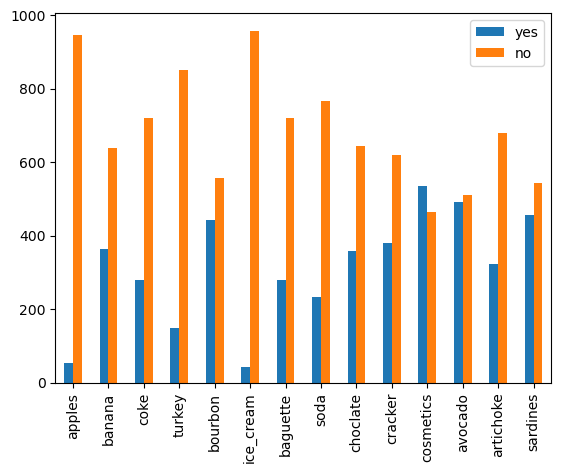

In [171]:
ax=purchased.plot.bar()
plt.show

In [172]:
Rules=list(apriori(transcations,min_support=0.2,min_confidence=0.3))
associationRules=ARutils.extract(Rules,'Cosmetics',2)
ARutils.inspect(associationRules)

The number of associated rules: 0


In [173]:
Rules= list(apriori(transcations, min_support=0.1, min_confidence=0.5))
associationRules= ARutils.extract(Rules, 'cosmetics',2)
ARutils.inspect(associationRules)

The number of associated rules: 24
LHS: ['artichoke'] --> RHS:['cosmetics'], support: 0.17, confidence: 0.52, lift: 0.97
--------------------------------------------------------------------------------
LHS: ['avocado'] --> RHS:['cosmetics'], support: 0.36, confidence: 0.73, lift: 1.36
--------------------------------------------------------------------------------
LHS: ['banana'] --> RHS:['cosmetics'], support: 0.19, confidence: 0.53, lift: 0.99
--------------------------------------------------------------------------------
LHS: ['bourbon'] --> RHS:['cosmetics'], support: 0.23, confidence: 0.52, lift: 0.98
--------------------------------------------------------------------------------
LHS: ['choclate'] --> RHS:['cosmetics'], support: 0.19, confidence: 0.54, lift: 1.00
--------------------------------------------------------------------------------
LHS: ['coke'] --> RHS:['cosmetics'], support: 0.14, confidence: 0.51, lift: 0.95
---------------------------------------------------------

In [174]:
!pip install plotly

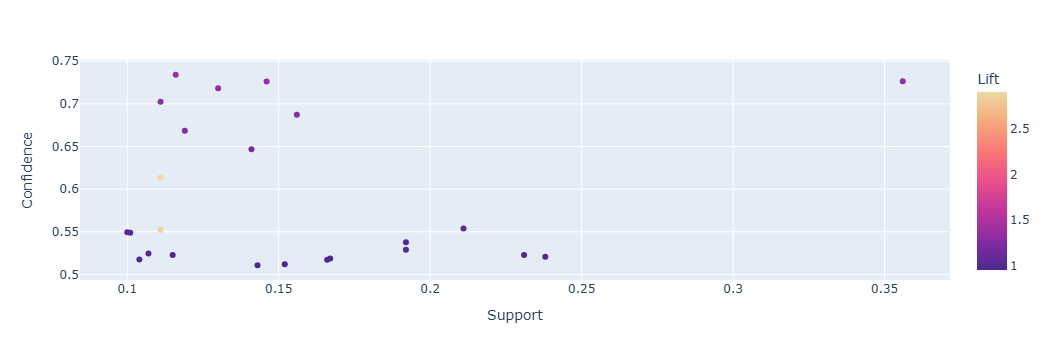

In [175]:
rules_df=pd.DataFrame(associationRules,columns=['LHS','RHS','Support','Confidence','Lift'])
import plotly.express as px

fig=px.scatter(rules_df,x="Support", y="Confidence", color="Lift",
               hover_data=['LHS','RHS'], color_continuous_scale="agsunset")
fig.show()

In [176]:
rules_df = pd.DataFrame(
    associationRules,
    columns=['LHS', 'RHS', 'Support', 'Confidence', 'Lift']
)

rules_df['LHS'] = rules_df['LHS'].apply(lambda x: ', '.join(x))
rules_df['RHS'] = rules_df['RHS'].apply(lambda x: ', '.join(x))



rules_df[rules_df['LHS'].str.contains('avocado')]


,LHS,RHS,Support,Confidence,Lift
1,avocado,cosmetics,0.356,0.726531,1.355468
8,"avocado, artichoke",cosmetics,0.116,0.734177,1.369734
9,"banana, avocado",cosmetics,0.119,0.668539,1.247275
10,"avocado, bourbon",cosmetics,0.141,0.646789,1.206696
11,"choclate, avocado",cosmetics,0.130,0.718232,1.339985
12,"cracker, avocado",cosmetics,0.146,0.726368,1.355164
13,"avocado, sardines",cosmetics,0.156,0.687225,1.282136
21,"choclate, avocado","cracker, cosmetics",0.111,0.613260,2.906444
22,"cracker, avocado","cosmetics, choclate",0.111,0.552239,2.876244
23,"cracker, choclate, avocado",cosmetics,0.111,0.702532,1.310693


In [177]:
avocado_rules = rules_df[rules_df['LHS'].apply(lambda x: 'avocado' in x)]
avocado_rules = avocado_rules.sort_values(by=['Lift'], ascending=False)
avocado_rules.head(10)


,LHS,RHS,Support,Confidence,Lift
21,"choclate, avocado","cracker, cosmetics",0.111,0.613260,2.906444
22,"cracker, avocado","cosmetics, choclate",0.111,0.552239,2.876244
8,"avocado, artichoke",cosmetics,0.116,0.734177,1.369734
1,avocado,cosmetics,0.356,0.726531,1.355468
12,"cracker, avocado",cosmetics,0.146,0.726368,1.355164
11,"choclate, avocado",cosmetics,0.130,0.718232,1.339985
23,"cracker, choclate, avocado",cosmetics,0.111,0.702532,1.310693
13,"avocado, sardines",cosmetics,0.156,0.687225,1.282136
9,"banana, avocado",cosmetics,0.119,0.668539,1.247275
10,"avocado, bourbon",cosmetics,0.141,0.646789,1.206696


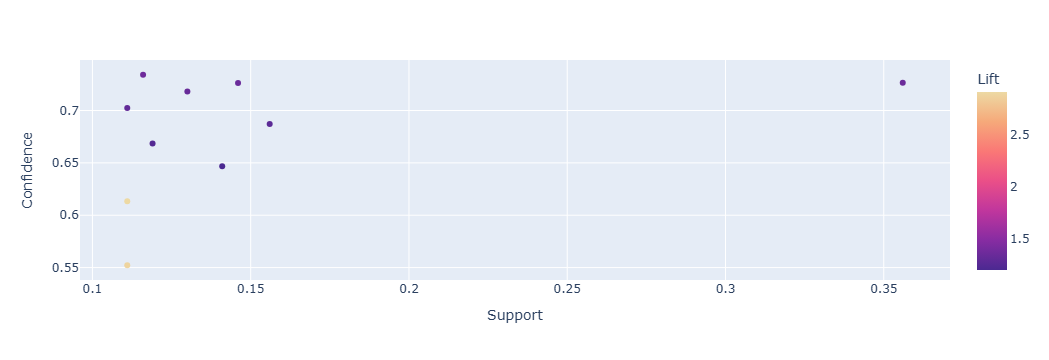

In [178]:
import plotly.express as px

fig = px.scatter(
    avocado_rules,
    x="Support",
    y="Confidence",
    color="Lift",
    hover_data=['LHS','RHS'],
    color_continuous_scale="agsunset"
)

fig.show()


### **5. Displaying and Filtering the Rules**

The `apriori` algorithm can find many rules. We'll sort them by **Lift**, which is the most important metric for finding non-obvious relationships. A lift value greater than 1 means the items are more likely to be bought together than if they were bought by chance.

We'll also look at a specific item, like **avocado**, to see all the rules it is involved in.

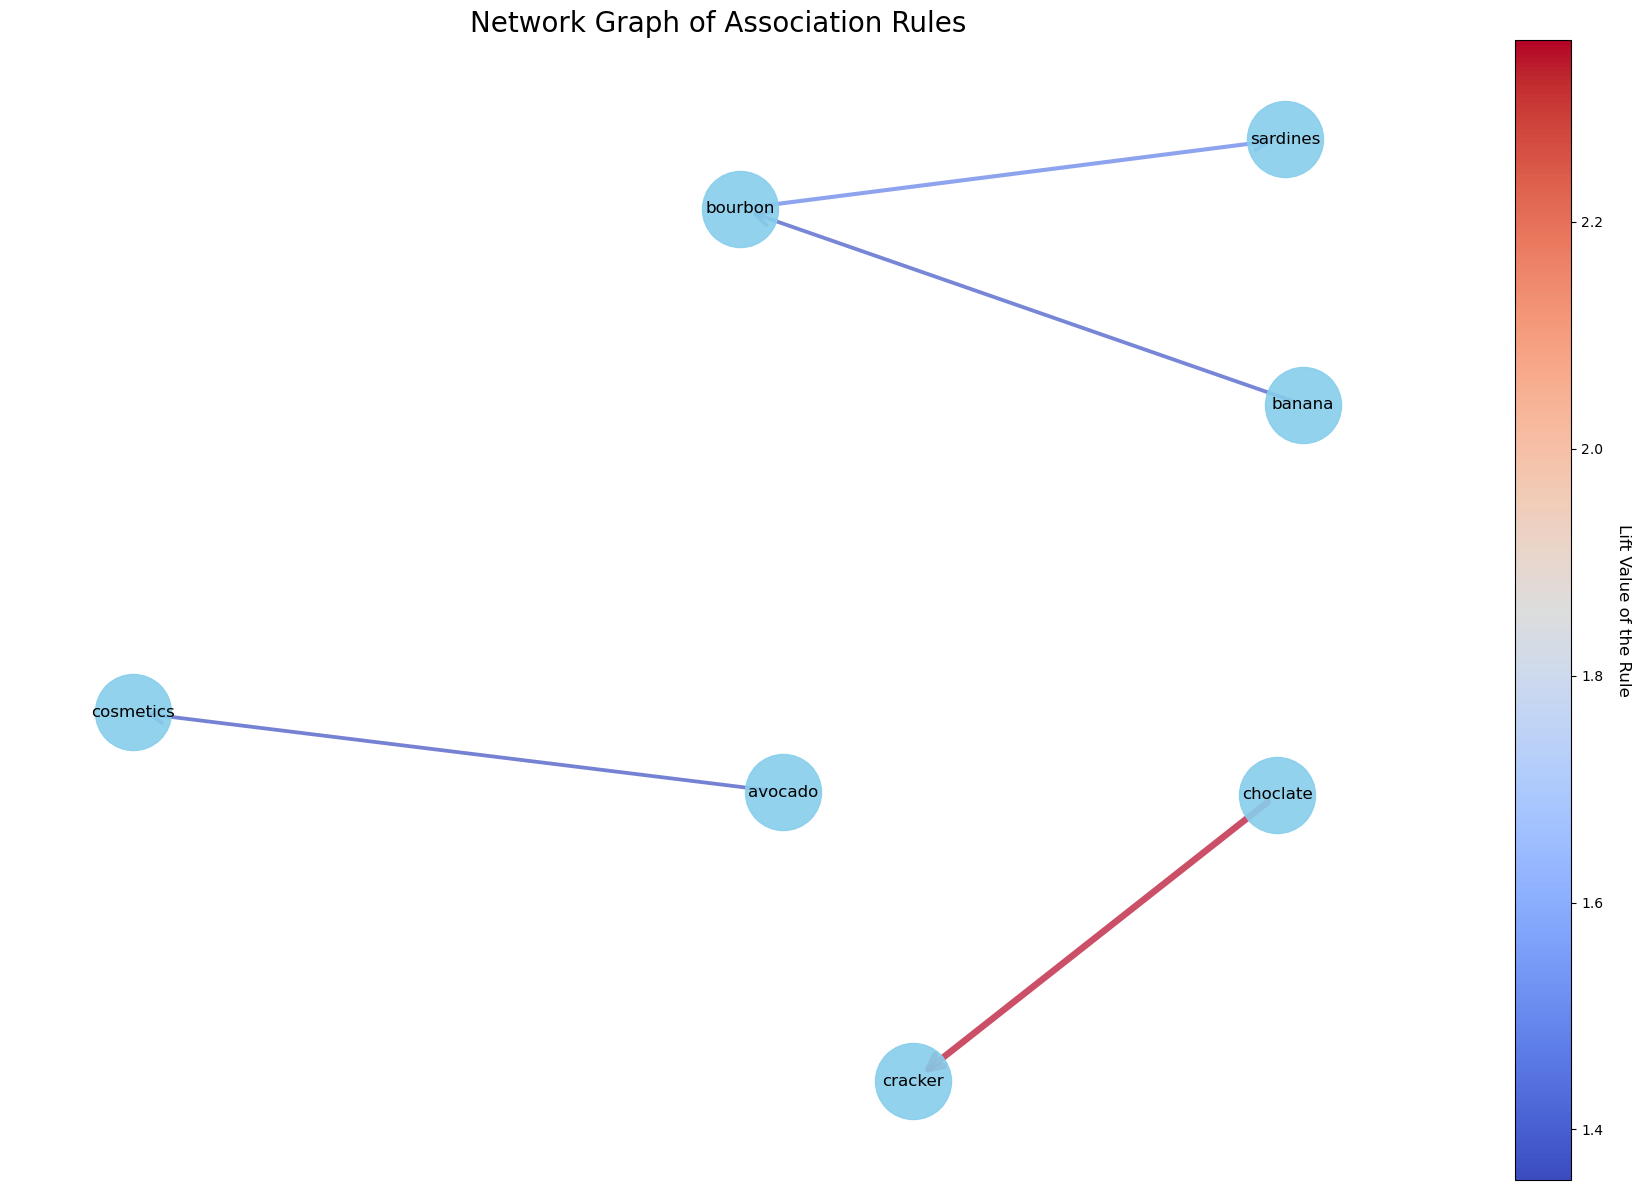

In [236]:
import networkx as nx
from apyori import apriori

transactions = []
for i in range(len(store_data)):
    transactions.append([item for item, purchased in store_data.iloc[i].items() if purchased == 'Yes'])


results = list(apriori(transactions, min_support=0.2, min_confidence=0.6, min_lift=1.0))

Rules_df = pd.DataFrame(
    [
        (
            list(result[2][0][0]),  # antecedent
            list(result[2][0][1]),  # consequent
            result[1],              # support
            result[2][0][2],        # confidence
            result[2][0][3]         # lift
        )
        for result in results
        if result[2]  
    ],
    columns=['antecedents', 'consequents', 'support', 'confidence', 'lift']
)

if Rules_df.empty:
    print("No association rules were found with the given parameters. Try adjusting the min_support, min_confidence, or min_lift values.")
else:
   
    G = nx.DiGraph()

    for index, row in Rules_df.iterrows():
        antecedent = ', '.join(list(row['antecedents']))
        consequent = ', '.join(list(row['consequents']))

        G.add_edge(antecedent, consequent, lift=row['lift'], support=row['support'], confidence=row['confidence'])

    edge_lifts = [edge[2]['lift'] for edge in G.edges(data=True)]
    
    if edge_lifts:
        norm = plt.Normalize(vmin=min(edge_lifts), vmax=max(edge_lifts))
        edge_colors = [plt.cm.coolwarm(norm(lift_val)) for lift_val in edge_lifts]
        edge_widths = [lift_val * 2 for lift_val in edge_lifts]

        plt.figure(figsize=(18, 12))
        pos = nx.spring_layout(G, k=0.8, iterations=50)

        nx.draw_networkx_nodes(G, pos, node_size=3000, node_color='skyblue', alpha=0.9)
        nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')
        nx.draw_networkx_edges(G, pos, width=edge_widths, arrowstyle='->', arrowsize=25,
                               edge_color=edge_colors, alpha=0.7)

        sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm, norm=norm)
        sm._A = []
        cbar = plt.colorbar(sm, ax=plt.gca(), pad=0.05)
        cbar.set_label('Lift Value of the Rule', rotation=270, labelpad=20, fontsize=12)

        plt.title('Network Graph of Association Rules', fontsize=20)
        plt.axis('off')
        plt.tight_layout()
        plt.show()
    else:
        print("The generated graph has no edges to draw.")

In [180]:
import pandas as pd
from apyori import apriori

# Assuming 'transcations' is already defined from your data
# This part of the code correctly extracts the rules and puts them into a DataFrame
Rules = list(apriori(transcations, min_support=0.2, min_confidence=0.3))

Rules_df = pd.DataFrame(
    [
        (
            list(result[2][0][0]),  # antecedents
            list(result[2][0][1]),  # consequents
            result[1],              # support
            result[2][0][2],        # confidence
            result[2][0][3]         # lift
        )
        for result in Rules
        if result[2]
    ],
    columns=['LHS', 'RHS', 'Support', 'Confidence', 'Lift']
)

# Sort and display the top 10 rules by Lift, as these are the most interesting
print("Top 10 Association Rules (Sorted by Lift):\n")
print(Rules_df.nlargest(10, 'Lift'))



Top 10 Association Rules (Sorted by Lift):

            LHS          RHS  Support  Confidence      Lift
16    [bourbon]   [sardines]    0.297    0.671946  1.470341
12     [banana]    [bourbon]    0.220    0.606061  1.371178
13    [bourbon]   [choclate]    0.204    0.461538  1.292825
15    [bourbon]    [cracker]    0.201    0.454751  1.193573
10    [avocado]    [cracker]    0.201    0.410204  1.076651
18  [cosmetics]    [cracker]    0.211    0.393657  1.033220
11    [avocado]   [sardines]    0.227    0.463265  1.013710
8     [avocado]    [bourbon]    0.218    0.444898  1.006556
0            []  [artichoke]    0.322    0.322000  1.000000
1            []    [avocado]    0.490    0.490000  1.000000


Missing values per column:
apples       0
banana       0
coke         0
turkey       0
bourbon      0
ice_cream    0
baguette     0
soda         0
choclate     0
cracker      0
cosmetics    0
avocado      0
artichoke    0
sardines     0
dtype: int64




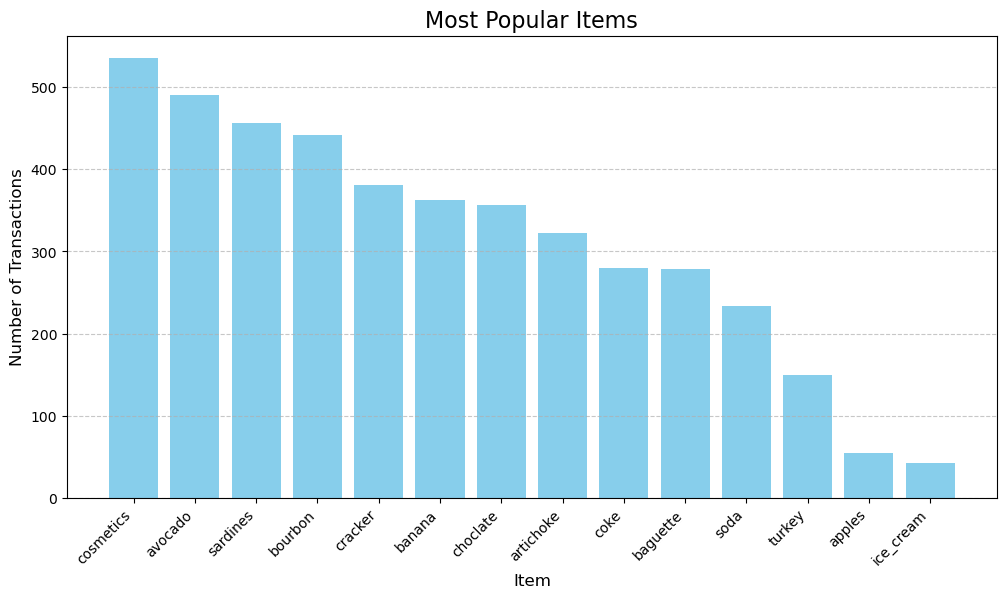

In [181]:
# Assuming your DataFrame is named 'store_data'
# Check for any missing values
print("Missing values per column:")
print(store_data.isnull().sum())
print("\n")

# If you have any missing data, you can choose to handle it, for example:
# store_data.fillna('No', inplace=True)

# Prepare data for item popularity analysis
item_counts = {}
for column in store_data.columns:
    yes_count = (store_data[column] == 'Yes').sum()
    item_counts[column] = yes_count

popularity_df = pd.DataFrame(item_counts.items(), columns=['Item', 'Purchase_Count'])
popularity_df = popularity_df.sort_values(by='Purchase_Count', ascending=False)

# Create a bar chart for item popularity
plt.figure(figsize=(12, 6))
plt.bar(popularity_df['Item'], popularity_df['Purchase_Count'], color='skyblue')
plt.title('Most Popular Items', fontsize=16)
plt.xlabel('Item', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
